## What is a Markov Decision Process (MDP)?

An MDP is a formal framework for decision-making where an agent interacts with an environment in discrete steps to achieve a goal.From the Reinforcement Learning (RL) perspective, an MDP is the mathematical framework that models decision-making situations where outcomes are partly random and partly under the control of an agent.

## MDP Components (RL Terms):
States (S): All possible situations the agent can be in.

Actions (A): Choices available to the agent in each state.

Transition Probability (P): Probability of moving from one state to another, given an action.

Reward (R): Immediate value received after a state transition.

Policy (π): A strategy that defines what action to take in each state. (not considered at this moment)

Discount Factor (γ): How much future rewards are valued over immediate rewards.

### MDP is defined by a 5-tuple:
               MDP = (𝑆,𝐴,𝑃,𝑅,𝛾)

## Example Scenario: GridWorld
States: each grid cell (e.g., (0, 0), (1, 2))

Actions: UP, DOWN, LEFT, RIGHT

Transitions: move in direction unless at edge

Rewards: green = +10 (goal), red = -5 (trap), others = 0

No learning yet, just movement and reward tracking

In [5]:
import pygame
import random

# ========== MDP Definition ==========
GRID_SIZE = 3
CELL_SIZE = 100
WIDTH = HEIGHT = GRID_SIZE * CELL_SIZE

# Rewards at specific states
REWARDS = {
    (2, 2): 10,   # Goal
    (1, 1): -5    # Trap
}

ACTIONS = ['UP', 'DOWN', 'LEFT', 'RIGHT']
GAMMA = 0.9  # Discount factor

# ========== Pygame Setup ==========
pygame.init()
win = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("MDP - GridWorld")

font = pygame.font.SysFont(None, 36)

WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
GREEN = (0, 200, 0)
RED = (200, 0, 0)
BLUE = (0, 0, 255)

agent_pos = [0, 0]  # Start state
total_reward = 0
step = 0

# ========== Drawing Functions ==========

def draw_grid():
    for x in range(0, WIDTH, CELL_SIZE):
        for y in range(0, HEIGHT, CELL_SIZE):
            rect = pygame.Rect(x, y, CELL_SIZE, CELL_SIZE)
            pygame.draw.rect(win, BLACK, rect, 1)

def draw_rewards():
    for pos, reward in REWARDS.items():
        x, y = pos
        color = GREEN if reward > 0 else RED
        pygame.draw.rect(win, color, (x*CELL_SIZE, y*CELL_SIZE, CELL_SIZE, CELL_SIZE))
        label = font.render(str(reward), True, WHITE)
        win.blit(label, (x*CELL_SIZE + 30, y*CELL_SIZE + 30))

def draw_agent():
    x, y = agent_pos
    pygame.draw.circle(win, BLUE, (x*CELL_SIZE + CELL_SIZE//2, y*CELL_SIZE + CELL_SIZE//2), 20)

# ========== MDP Transition Logic ==========

def transition(state, action):
    x, y = state
    if action == 'UP' and y > 0:
        y -= 1
    elif action == 'DOWN' and y < GRID_SIZE - 1:
        y += 1
    elif action == 'LEFT' and x > 0:
        x -= 1
    elif action == 'RIGHT' and x < GRID_SIZE - 1:
        x += 1
    return (x, y)

def move_agent():
    global agent_pos, total_reward, step
    action = random.choice(ACTIONS)  # For now, random policy
    new_state = transition(agent_pos, action)
    reward = REWARDS.get(new_state, 0)
    discounted_reward = (GAMMA ** step) * reward
    total_reward += discounted_reward
    agent_pos[:] = new_state
    step += 1

    print(f"Step {step}: State={tuple(agent_pos)}, Action={action}, Reward={reward}, Discounted Total={total_reward:.2f}")

# ========== Main Loop ==========

def main():
    clock = pygame.time.Clock()
    run = True
    max_steps = 20

    while run and step < max_steps:
        win.fill(WHITE)
        draw_grid()
        draw_rewards()
        draw_agent()
        pygame.display.flip()
        pygame.time.delay(800)

        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                run = False

        move_agent()
        clock.tick(60)
        

    print("Final Discounted Reward:", round(total_reward, 2))
    pygame.quit()
if __name__ == "__main__":
    main()


Step 1: State=(1, 0), Action=RIGHT, Reward=0, Discounted Total=0.00
Step 2: State=(1, 1), Action=DOWN, Reward=-5, Discounted Total=-4.50
Step 3: State=(1, 2), Action=DOWN, Reward=0, Discounted Total=-4.50
Step 4: State=(1, 2), Action=DOWN, Reward=0, Discounted Total=-4.50
Step 5: State=(1, 1), Action=UP, Reward=-5, Discounted Total=-7.78
Step 6: State=(2, 1), Action=RIGHT, Reward=0, Discounted Total=-7.78
Step 7: State=(2, 0), Action=UP, Reward=0, Discounted Total=-7.78
Step 8: State=(1, 0), Action=LEFT, Reward=0, Discounted Total=-7.78
Step 9: State=(1, 1), Action=DOWN, Reward=-5, Discounted Total=-9.93
Step 10: State=(1, 0), Action=UP, Reward=0, Discounted Total=-9.93
Step 11: State=(1, 0), Action=UP, Reward=0, Discounted Total=-9.93
Step 12: State=(2, 0), Action=RIGHT, Reward=0, Discounted Total=-9.93
Step 13: State=(1, 0), Action=LEFT, Reward=0, Discounted Total=-9.93
Step 14: State=(0, 0), Action=LEFT, Reward=0, Discounted Total=-9.93
Step 15: State=(0, 0), Action=UP, Reward=0, Di

## RL Agent's Goal:
The agent learns a policy that maximizes the cumulative reward over time.

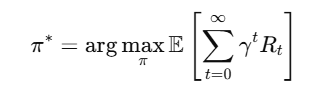

### Goal: Apply a Predefined Policy
Instead of moving randomly, the agent will follow a fixed policy:
→ Move RIGHT until end of row, then move DOWN to the next row, and repeat (like scanning a page).



### Purpose:
Help to understand how policy changes behavior and how trajectory + reward change compared to a random policy.

In [6]:
'''
def simple_policy(state):
    x, y = state
    if x < GRID_SIZE - 1:
        return 'RIGHT'
    elif y < GRID_SIZE - 1:
        return 'DOWN'
    else:
        return None  # Terminal
'''

"\ndef simple_policy(state):\n    x, y = state\n    if x < GRID_SIZE - 1:\n        return 'RIGHT'\n    elif y < GRID_SIZE - 1:\n        return 'DOWN'\n    else:\n        return None  # Terminal\n"

In [3]:
import pygame

# ========== MDP Definition ==========
GRID_SIZE = 3
CELL_SIZE = 100
WIDTH = HEIGHT = GRID_SIZE * CELL_SIZE

REWARDS = {
    (2, 2): 10,   # Goal
    (1, 1): -5    # Trap
}

ACTIONS = ['UP', 'DOWN', 'LEFT', 'RIGHT']
GAMMA = 0.9  # Discount factor

# ========== Pygame Setup ==========
pygame.init()
win = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("MDP - GridWorld (With Policy)")

font = pygame.font.SysFont(None, 36)

WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
GREEN = (0, 200, 0)
RED = (200, 0, 0)
BLUE = (0, 0, 255)

agent_pos = [0, 0]
total_reward = 0
step = 0

# ========== Drawing Functions ==========

def draw_grid():
    for x in range(0, WIDTH, CELL_SIZE):
        for y in range(0, HEIGHT, CELL_SIZE):
            rect = pygame.Rect(x, y, CELL_SIZE, CELL_SIZE)
            pygame.draw.rect(win, BLACK, rect, 1)

def draw_rewards():
    for pos, reward in REWARDS.items():
        x, y = pos
        color = GREEN if reward > 0 else RED
        pygame.draw.rect(win, color, (x*CELL_SIZE, y*CELL_SIZE, CELL_SIZE, CELL_SIZE))
        label = font.render(str(reward), True, WHITE)
        win.blit(label, (x*CELL_SIZE + 30, y*CELL_SIZE + 30))

def draw_agent():
    x, y = agent_pos
    pygame.draw.circle(win, BLUE, (x*CELL_SIZE + CELL_SIZE//2, y*CELL_SIZE + CELL_SIZE//2), 20)

# ========== MDP Policy-Based Transition ==========

def transition(state, action):
    x, y = state
    if action == 'UP' and y > 0: y -= 1
    elif action == 'DOWN' and y < GRID_SIZE - 1: y += 1
    elif action == 'LEFT' and x > 0: x -= 1
    elif action == 'RIGHT' and x < GRID_SIZE - 1: x += 1
    return (x, y)

def simple_policy(state):
    x, y = state
    if x < GRID_SIZE - 1:
        return 'RIGHT'
    elif y < GRID_SIZE - 1:
        return 'DOWN'
    else:
        return None

def move_agent_by_policy():
    global agent_pos, total_reward, step

    current_state = tuple(agent_pos)
    action = simple_policy(current_state)

    if action is None:
        return False  # Terminal

    next_state = transition(current_state, action)
    reward = REWARDS.get(next_state, 0)
    discounted_reward = (GAMMA ** step) * reward
    total_reward += discounted_reward

    agent_pos[:] = next_state
    step += 1

    print(f"Step {step}: State={current_state}, Action={action}, Next={next_state}, Reward={reward}, Total={total_reward:.2f}")
    return True

# ========== Main Loop ==========

def main():
    clock = pygame.time.Clock()
    max_steps = 30  # to increase the no of steps
    run = True

    while run:
        win.fill(WHITE)
        draw_grid()
        draw_rewards()
        draw_agent()
        pygame.display.flip()
        pygame.time.delay(800)

        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                run = False

        keep_moving = move_agent_by_policy()
        if not keep_moving:
            break

        clock.tick(60)

    print("\nFinal Discounted Reward:", round(total_reward, 2))
    pygame.quit()

if __name__ == "__main__":
    main()


Step 1: State=(0, 0), Action=RIGHT, Next=(1, 0), Reward=0, Total=0.00
Step 2: State=(1, 0), Action=RIGHT, Next=(2, 0), Reward=0, Total=0.00
Step 3: State=(2, 0), Action=DOWN, Next=(2, 1), Reward=0, Total=0.00
Step 4: State=(2, 1), Action=DOWN, Next=(2, 2), Reward=10, Total=7.29

Final Discounted Reward: 7.29
